# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error as mse, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Данные

Признаки генерируются случайным образом. Зависимая переменная выводится из формулы: $y = \frac{e^{-x^2-6x+5}}{70000} \cdot z - 4 \sin 0.3x + \sqrt{|x|} \cdot z^2$

Text(0.5, 0.92, 'Распределение данных')

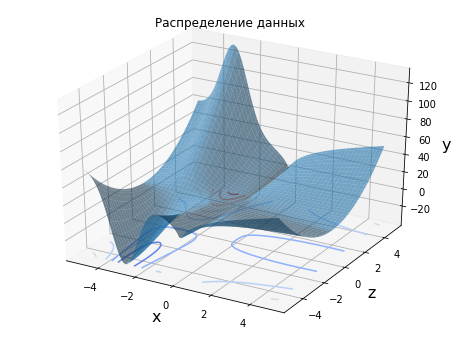

In [3]:
fig = plt.figure(figsize=(8,6))

fun = lambda x, z: np.exp(-x**2 - 6*x +5)/70000*z - 4*np.sin(0.3*x) + np.abs(x)**(1/2)*(z**2)
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(x1, x2)
y = fun(x1, x2)

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, y, alpha=0.6)
ax.contour(x1, x2, y, zdir='z', 
              offset=y.min(), cmap=cm.coolwarm)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('z', fontsize=16)
ax.set_zlabel('y', fontsize=16)
ax.set_title('Распределение данных')

In [4]:
np.random.seed(8)
X = np.random.normal(loc=-3, scale=100, size=(10000,))
Z = np.random.normal(scale=5, size=(10000,))
y = pd.Series(np.exp(-X**2 - 6*X +5)/70000*Z - 4*np.sin(0.3*X) + np.abs(X)**(1/2)*(Z**2), name='y')
X = pd.DataFrame(np.vstack((X, Z)).T, columns=['X', 'Z'])
X.head()

X          Z
0    6.120472   5.372936
1  106.128273  -1.247881
2 -197.697031  -6.030351
3 -141.634953   7.144814
4 -232.649157 -12.955767

In [83]:
X.describe()

X        Z
count 10000.00 10000.00
mean     -2.91    -0.02
std     100.46     5.02
min    -410.16   -22.63
25%     -70.68    -3.37
50%      -2.91    -0.07
75%      65.39     3.31
max     354.59    19.49

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

# Обучение модели и CV

In [6]:
# красота
pd.options.display.float_format = '{:.2f}'.format
plt.style.use('ggplot')
plt.rcParams['lines.color'] = '#3E5F8A'
plt.rcParams['figure.figsize'] = (10, 4)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

In [ ]:
param = {'n_estimators':np.arange(10, 500, 20), 'learning_rate':0.1**np.arange(5)}
gs = GridSearchCV(GradientBoostingRegressor(random_state=8),
                   param, make_scorer(r2_score), verbose=3, cv=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits
[CV] learning_rate=1.0, n_estimators=10 ..............................
[CV] .. learning_rate=1.0, n_estimators=10, score=0.950, total=   0.1s
[CV] learning_rate=1.0, n_estimators=10 ..............................
[CV] .. learning_rate=1.0, n_estimators=10, score=0.961, total=   0.0s
[CV] learning_rate=1.0, n_estimators=10 ..............................
[CV] .. learning_rate=1.0, n_estimators=10, score=0.962, total=   0.0s
[CV] learning_rate=1.0, n_estimators=30 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .. learning_rate=1.0, n_estimators=30, score=0.954, total=   0.1s
[CV] learning_rate=1.0, n_estimators=30 ..............................
[CV] .. learning_rate=1.0, n_estimators=30, score=0.978, total=   0.1s
[CV] learning_rate=1.0, n_estimators=30 ..............................
[CV] .. learning_rate=1.0, n_estimators=30, score=0.960, total=   0.1s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] .. learning_rate=1.0, n_estimators=50, score=0.959, total=   0.2s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] .. learning_rate=1.0, n_estimators=50, score=0.981, total=   0.2s
[CV] learning_rate=1.0, n_estimators=50 ..............................
[CV] .. learning_rate=1.0, n_estimators=50, score=0.973, total=   0.2s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] .. learning_rate=1.0, n_estimators=70, score=0.965, total=   0.3s
[CV] learning_rate=1.0, n_estimators=70 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:  6.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

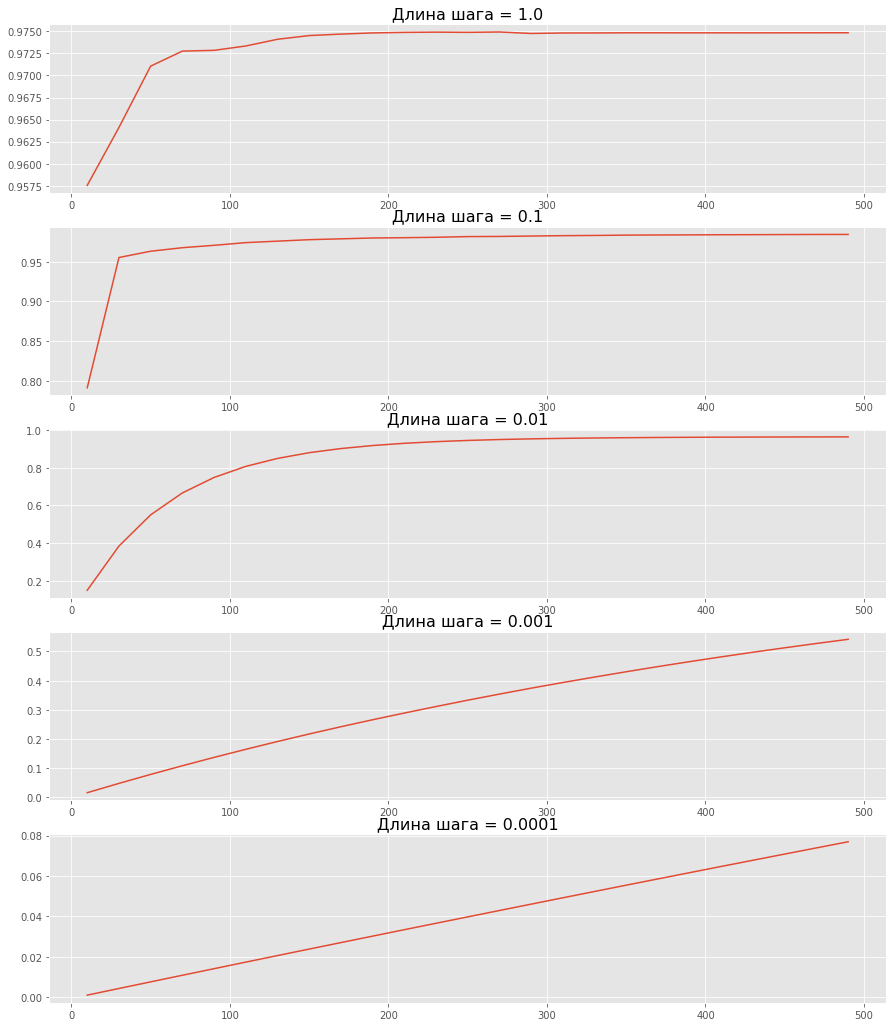

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 18))
n_ests = len(param["n_estimators"])
for i in range(5):
  axes[i].plot(param["n_estimators"], gs.cv_results_["mean_test_score"][i*n_ests:(i+1)*n_ests])
  axes[i].set_title(f"Длина шага = {round(param['learning_rate'][i], i)}")

In [ ]:
gs.best_params_ # на самом деле уже с 300 деревьев хорошее качество

{'learning_rate': 0.1, 'n_estimators': 490}

Хорошая сходимость, начиная с 300 деревьев

In [ ]:
param = {"max_depth":np.arange(1,9), "min_samples_leaf":[1, 3, 9, 27], "min_samples_split":[3, 9, 27, 81]}
gs = GridSearchCV(GradientBoostingRegressor(random_state=8, n_estimators=300),
                   param, make_scorer(r2_score), verbose=3, cv=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.955, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.967, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.967, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.955, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.967, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=9 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=9, score=0.967, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=27, score=0.955, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=27, score=0.967, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=27 ...........
[CV]  max_depth=1, min_samples_leaf=1, min_samples

[Parallel(n_jobs=1)]: Done 384 out of 384 | elapsed: 11.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=300,
                                                 n_iter_n...
                            

In [ ]:
gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 9}

## GB for DataFrame

In [7]:
model1 = GradientBoostingRegressor(n_estimators=300, max_depth=4, min_samples_leaf=1, min_samples_split=9, random_state=8)

In [8]:
model1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
r2_score(y_test, model1.predict(X_test))

0.9910743162152493

## GB for array

In [10]:
model2 = GradientBoostingRegressor(n_estimators=300, max_depth=4, min_samples_leaf=1, min_samples_split=9, random_state=8)

In [11]:
model2.fit(X_train.values, y_train.values)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## PDP

In [ ]:
#!pip install pdpbox

In [13]:
from pdpbox import pdp

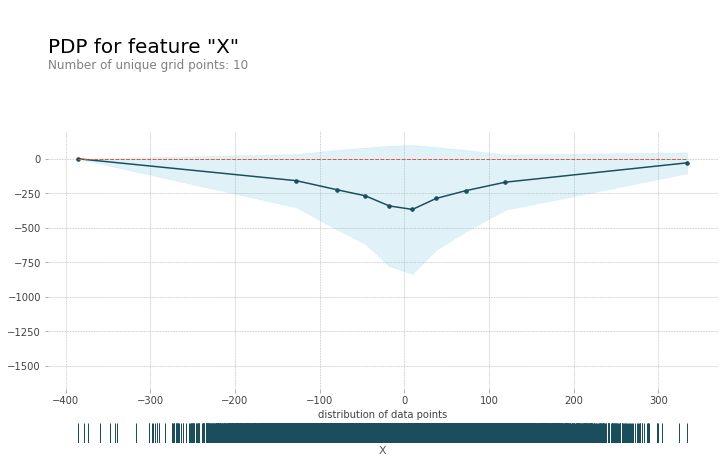

Text(0, 0.5, 'y')

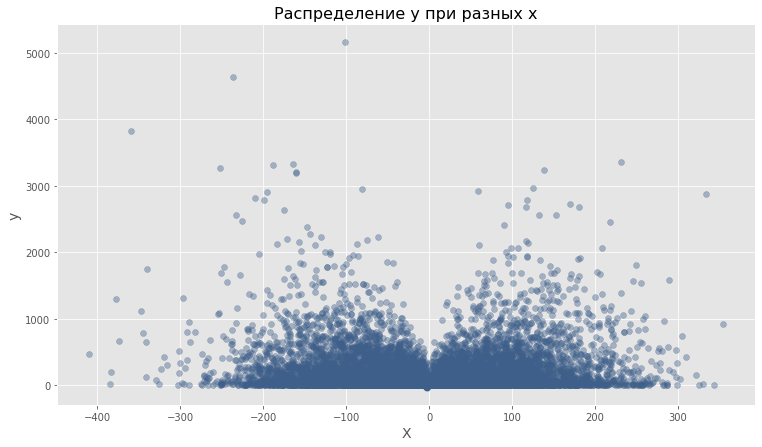

In [43]:
pdp.pdp_plot(
    pdp.pdp_isolate(
        model=model1,
        dataset=X_train,
        model_features=X_train.columns,
        feature='X', n_jobs=1
    ),
    feature_name='X',
    plot_pts_dist=True,
    figsize=(12, 8), 
    plot_params={'title_fontsize': 20, 'fontsize':16},
)
plt.show()
plt.figure(figsize=(12.5,7))
plt.scatter(X['X'], y, c='#3E5F8A', alpha=0.4)
plt.title('Распределение y при разных x')
plt.xlabel('X')
plt.ylabel('y')

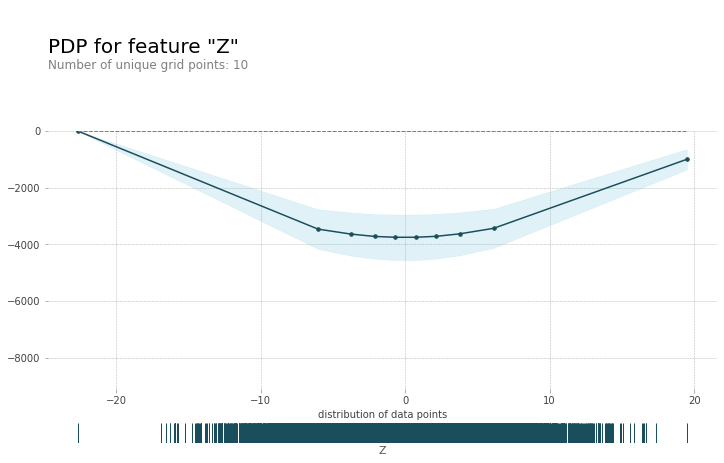

Text(0, 0.5, 'y')

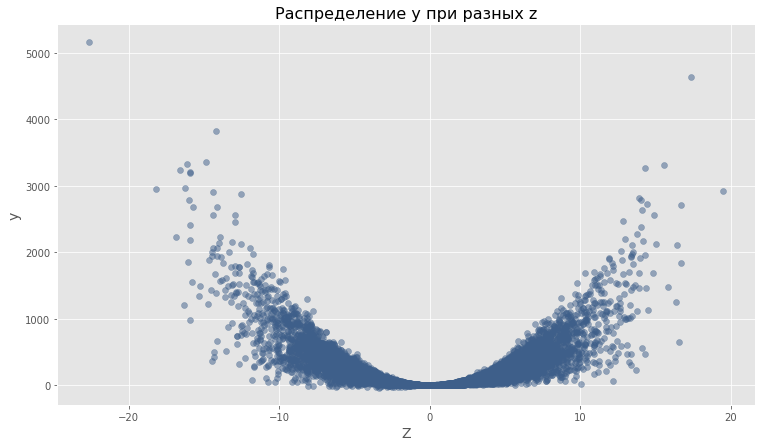

In [44]:
pdp.pdp_plot(
    pdp.pdp_isolate(
        model=model1,
        dataset=X_train,
        model_features=X_train.columns,
        feature='Z', n_jobs=1
    ),
    feature_name='Z',
    plot_pts_dist=True, 
    figsize=(12, 8), 
    plot_params={'title_fontsize': 20, 'fontsize':16}
)
plt.show()
plt.figure(figsize=(12.5,7))
plt.scatter(X['Z'], y, c='#3E5F8A', alpha=0.5)
plt.title('Распределение y при разных z')
plt.xlabel('Z')
plt.ylabel('y')

### Небольшой контрпример

In [45]:
np.random.seed(8)
Xv = np.random.normal(loc=-3, scale=100, size=(10000,))
Zv = np.random.normal(scale=5, size=(10000,))
yv = pd.Series(np.exp(-Xv**2 - 6*Xv +5)/70000*Zv - 4*np.sin(0.3*Xv) + Zv**2, name='yv')
Xv = pd.DataFrame(np.vstack((Xv, Zv)).T, columns=['Xv', 'Zv'])
Xv.head()

Xv     Zv
0    6.12   5.37
1  106.13  -1.25
2 -197.70  -6.03
3 -141.63   7.14
4 -232.65 -12.96

In [46]:
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv, yv, random_state=8)

In [47]:
modelv = GradientBoostingRegressor(n_estimators=300, max_depth=4, min_samples_leaf=1, min_samples_split=9, random_state=8)
modelv.fit(Xv_train, yv_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

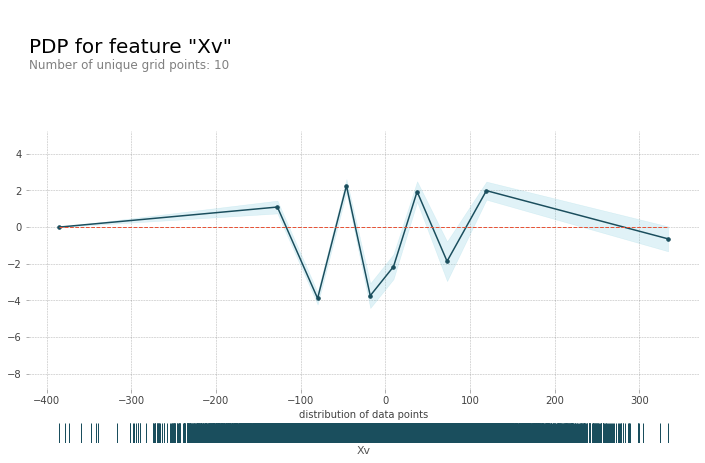

Text(0, 0.5, 'yv')

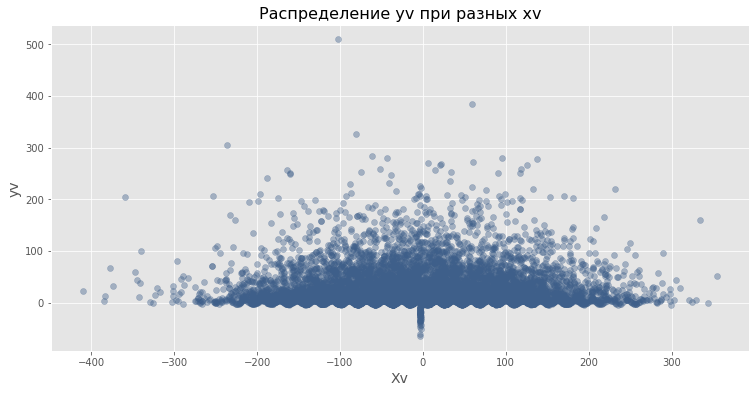

In [51]:
pdp.pdp_plot(
    pdp.pdp_isolate(
        model=modelv,
        dataset=Xv_train,
        model_features=Xv_train.columns,
        feature='Xv', n_jobs=1
    ),
    feature_name='Xv',
    plot_pts_dist=True,
    figsize=(12, 8), 
    plot_params={'title_fontsize': 20, 'fontsize':16},
)
plt.show()
plt.figure(figsize=(12.5,6))
plt.scatter(Xv['Xv'], yv, c='#3E5F8A', alpha=0.4)
plt.title('Распределение yv при разных xv')
plt.xlabel('Xv')
plt.ylabel('yv')

### Продолжение примера

In [52]:
pdpdata = pdp.pdp_interact(model=model1, num_grid_points=[10, 10],
                           dataset=X_train,
                           model_features=X_train.columns,
                           features=['X','Z'])

(<Figure size 756x900 with 5 Axes>,
 {'pdp_inter_ax': {'_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f30fee1f898>,
   '_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f30fee01b38>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f30fedadac8>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f30fee33160>})

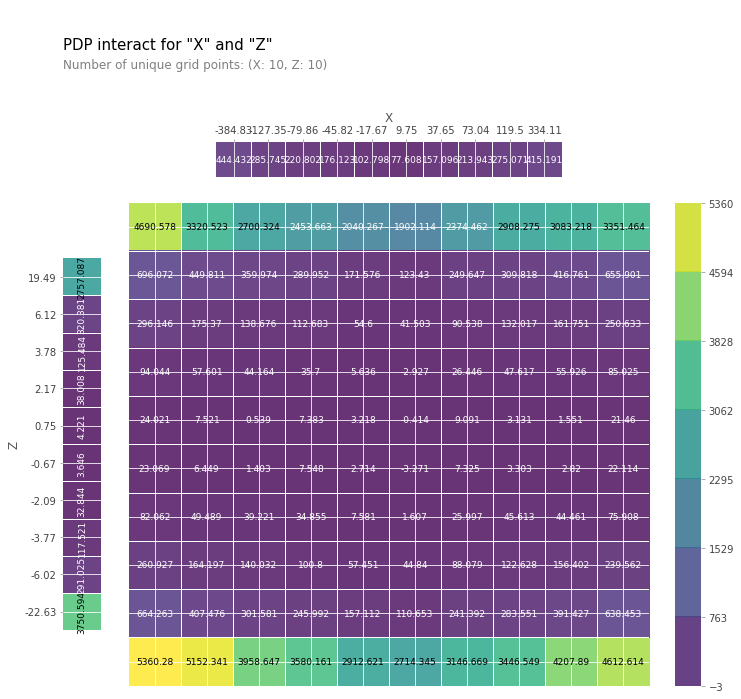

In [53]:
pdp.pdp_interact_plot(pdpdata,
                      feature_names=['X','Z'],
                      plot_type='grid',
                      plot_pdp=True)

TypeError: ignored

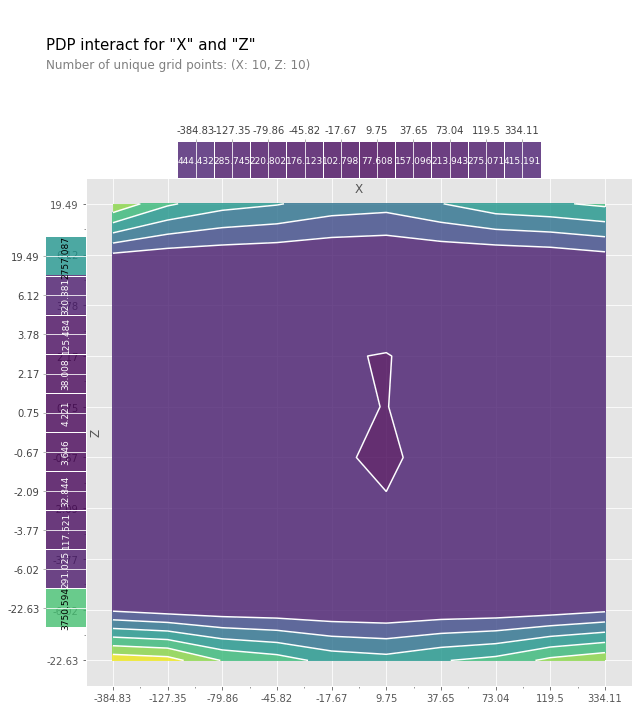

In [54]:
# здесь появляется ошибка -- это нормально
pdp.pdp_interact_plot(pdpdata,feature_names=['X','Z'], plot_pdp=True)

Text(0.5, 0.92, 'Распределение данных')

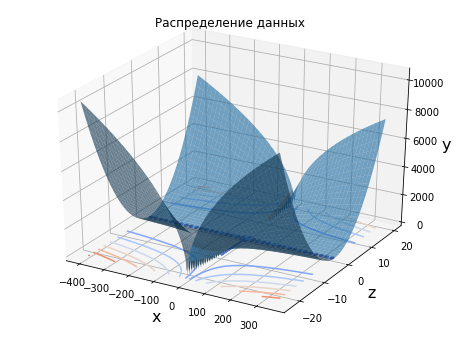

In [5]:
fig = plt.figure(figsize=(8,6))

fun = lambda x, z: np.exp(-x**2 - 6*x +5)/70000*z - 4*np.sin(0.3*x) + np.abs(x)**(1/2)*(z**2)
x1 = np.linspace(-400, 350, 1000)
x2 = np.linspace(-23, 20, 1000)
x1, x2 = np.meshgrid(x1, x2)
y = fun(x1, x2)

ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1, x2, y, alpha=0.6)
ax.contour(x1, x2, y, zdir='z', 
              offset=y.min(), cmap=cm.coolwarm)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('z', fontsize=16)
ax.set_zlabel('y', fontsize=16)
ax.set_title('Распределение данных')

## LIME

In [ ]:
#!pip install lime

In [32]:
from lime.lime_tabular import LimeTabularExplainer

In [33]:
explainer = LimeTabularExplainer(training_data=X_train.values,
                                 mode='regression',
                                 feature_names=X_train.columns,
                                 verbose=True, 
                                 random_state=8)

In [71]:
exp = explainer.explain_instance(X_train.values[0], model2.predict)

Intercept 143.63761453098738
Prediction_local [518.95266737]
Right: 124.86149969117582


In [72]:
print('Истинное значение для данного объекта:', y_train.values[0])

Истинное значение для данного объекта: 131.89417338199885


In [73]:
exp.show_in_notebook()

## SHAP

In [ ]:
#!pip install shap

In [38]:
import shap

### KernelSHAP

In [77]:
%%time
kernel = shap.KernelExplainer(model2.predict, shap.kmeans(X_train.values, 100))

CPU times: user 3.29 s, sys: 2.47 s, total: 5.76 s
Wall time: 2.94 s


In [78]:
%%time
shap_values = kernel.shap_values(X_train.values)


CPU times: user 23.9 s, sys: 610 ms, total: 24.5 s
Wall time: 23.9 s


In [79]:
shap.initjs()
shap.force_plot(kernel.expected_value, shap_values[0], X_train.loc[X_train.index[0]])

In [ ]:
shap.initjs()
shap.force_plot(kernel.expected_value, shap_values[:200], X_train.values[:200], feature_names=X_train.columns, figsize=(18,3))

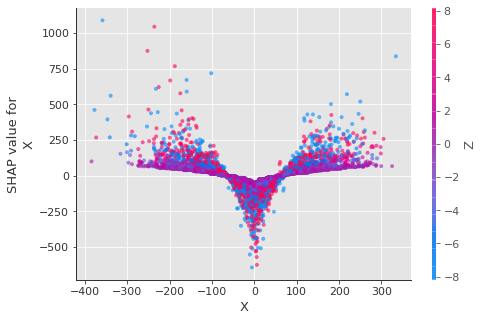

In [84]:
shap.initjs()
shap.dependence_plot("X", shap_values, X_train, alpha=0.6)

### TreeSHAP

In [80]:
%%time
tree = shap.TreeExplainer(model2, shap.kmeans(X_train.values, 100))

CPU times: user 3.36 s, sys: 2.55 s, total: 5.91 s
Wall time: 3.03 s


In [81]:
%%time
tree_shap_values = tree.shap_values(X_train.values, y_train, tree_limit=300)

 97%|=================== | 7305/7500 [00:27<00:00]       

CPU times: user 27.5 s, sys: 15.6 ms, total: 27.5 s
Wall time: 27.5 s


In [82]:
shap.initjs()
shap.force_plot(tree.expected_value, tree_shap_values[0], X_train.loc[X_train.index[0]])

In [ ]:
shap.initjs()
shap.force_plot(tree.expected_value, tree_shap_values[:200], X_train.values[:200], feature_names=X_train.columns, figsize=(18,3))

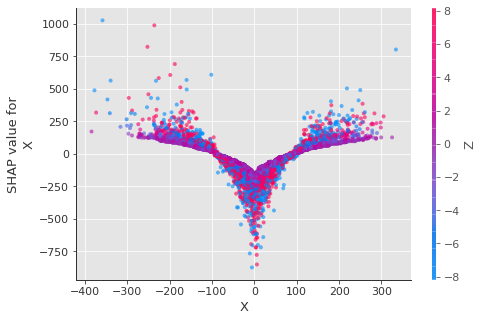

In [ ]:
shap.initjs()
shap.dependence_plot("X", tree_shap_values, X_train, alpha=0.6)

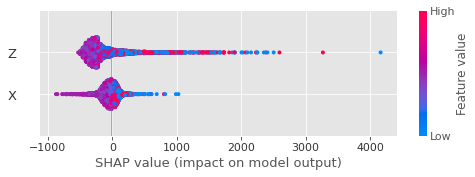

In [ ]:
shap.summary_plot(tree_shap_values, X_train)